# Quantum Computing & Quantum Machine Learning (Q-ML)

<img src="https://media.giphy.com/media/obT4MfCI9FLuU/giphy.gif">

## Quantum Computing

#### Wiki Definintion :

# Quantum Machine Learning

#### Wiki Definintion :

## Why do we need quantum computers?

## Why quantum computers are faster

![ChessUrl](https://upload.wikimedia.org/wikipedia/commons/7/71/ChessPawnSpecialMoves.gif "chess")

## How do quantum computers work?

# What's a qubit?

### Superfluids

### Superconductors

### Control

### Superposition

<img src="https://media.giphy.com/media/XbC8Uy0rEhdTtF6lVa/giphy.gif">

### Entanglement

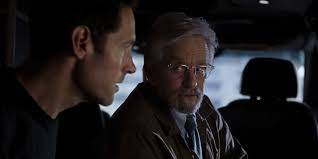

# How do quantum computers consider, fundamentally, more possibilities at once?

# Quantum computers are probability

# Requisites

### Windows

In [1]:
#!pip install qiskit numpy jupyterlab matplotlib qiskit-ibmq-provider

### Linux

### Let's write "Hello World" program of Quatum world

<img src="https://media.giphy.com/media/QuIxFwQo0RMT1tASlV/giphy.gif">


In [2]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
circuit.x(0) # "x" is a "not" gate. It flips the value. Starting value is a 0, so this flips to a 1. 
circuit.cx(0, 1) #cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
circuit.measure([0,1], [0,1])

In [3]:
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

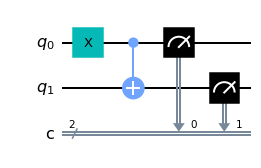

In [4]:
circuit.draw(output="mpl")

### Lets configure IBM Quantum Lab

#### Save token in the Text File

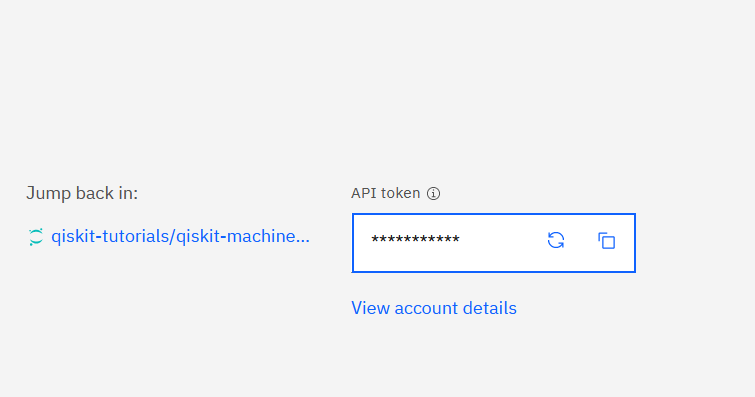

In [5]:
from qiskit import IBMQ
IBMQ.save_account(open("api_token.txt","r").read())

configrc.store_credentials:WARNING:2022-04-20 02:11:20,630: Credentials already present. Set overwrite=True to overwrite.


In [6]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [7]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [8]:
provider = IBMQ.get_provider("ibm-q")
provider

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

#### List of available backend lab server to run our program

In [9]:
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 1 queued and simulated qubits
ibmq_armonk has 0 queued and 1 qubits
ibmq_santiago has 32 queued and 5 qubits
ibmq_bogota has 59 queued and 5 qubits
ibmq_lima has 15 queued and 5 qubits
ibmq_belem has 6 queued and 5 qubits
ibmq_quito has 3 queued and 5 qubits
simulator_statevector has 1 queued and simulated qubits
simulator_mps has 1 queued and simulated qubits
simulator_extended_stabilizer has 1 queued and simulated qubits
simulator_stabilizer has 1 queued and simulated qubits
ibmq_manila has 6 queued and 5 qubits


#### Selected *"ibmq_lima"* from available server

In [10]:
from qiskit.tools.monitor import job_monitor
backend = provider.get_backend("ibmq_lima")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


In [11]:
from qiskit.visualization import plot_histogram
from matplotlib import style

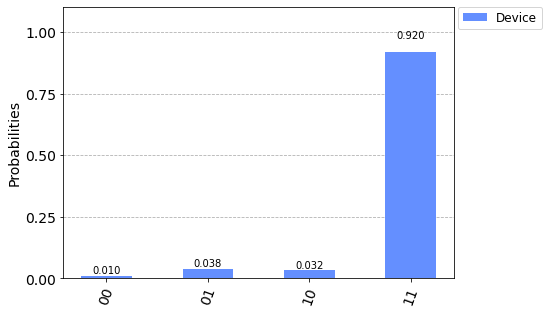

In [12]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])

### Selected QASM Simultor as backend

In [13]:
circuit = q.QuantumCircuit(2,2)  # 2 qbits, 2 classical bits.
circuit.h(0) # Hadamard gate, puts qubit 0 into superposition
circuit.cx(0, 1) #cnot, controlled not, Flips 2nd qubit's value if first qubit is 1
circuit.measure([0,1], [0,1])  # ([qbitregister], [classicalbitregister]) Measure qubit 0 and 1 to classical bits 0 and 1

#### *Hammond gate gives qubit wiiings i.e Superposition*

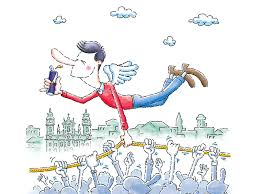

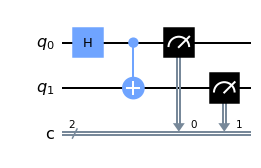

In [14]:
circuit.draw(output="mpl")

In [21]:
backend = provider.get_backend("ibmq_qasm_simulator")
job = q.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


In [22]:
result = job.result()
counts = result.get_counts(circuit)

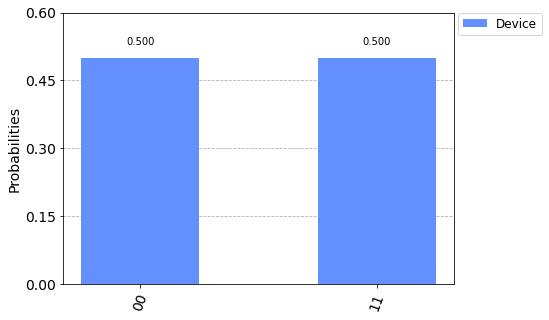

In [23]:
plot_histogram([counts], legend=['Device'])

### Selected backend from AER framework

In [24]:
from qiskit import Aer  # simulator framework from qiskit

# will create a statevector of possibilities. 
sim_backend = Aer.get_backend('qasm_simulator')

In [25]:
for backend in Aer.backends():
    print(backend)

aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [26]:
job = q.execute(circuit, backend=sim_backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


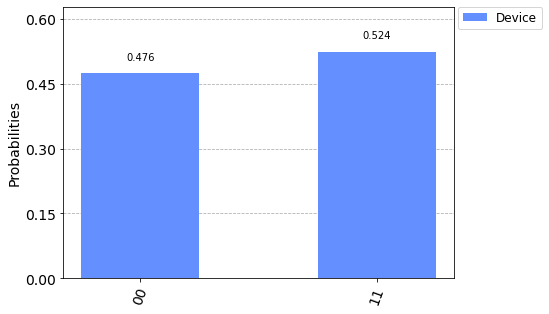

In [27]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts], legend=['Device'])

# Qubits & Gates in Quantum Simulators

In [28]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("dark_background") # I am using dark mode notebook, so I use this to see the chart.
# to use dark mode:
# edited '/usr/local/lib/python3.7/dist-packages/qiskit/visualization/bloch.py line 177 self.font_color = 'white'
# edited '/usr/local/lib/python3.7/dist-packages/qiskit/visualization/counts_visualization.py line 206     ax.set_facecolor('#000000')
%matplotlib inline


statevec_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend('qasm_simulator')

def do_job(circuit):
    """
    backend as Statevector Sim
    """
    job = q.execute(circuit, backend=statevec_simulator)
    result = job.result()
    statevec = result.get_statevector()
    
    """
    backend as QASM Sim
    """
    n_qubits = circuit.num_qubits
    circuit.measure([i for i in range(n_qubits)], [i for i in range(n_qubits)])
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts

In [29]:
circuit = q.QuantumCircuit(2, 2)  # 2 qubits, 2 classical bits 
circuit

In [30]:
circuit.draw()

In [31]:
statevec, counts = do_job(circuit)

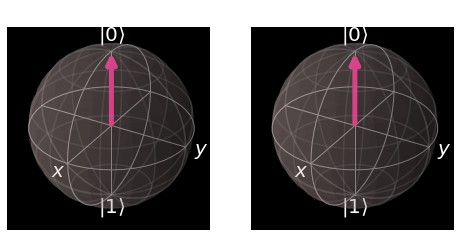

In [32]:
plot_bloch_multivector(statevec)

In [ ]:
plot_histogram([counts], legend=['output'])

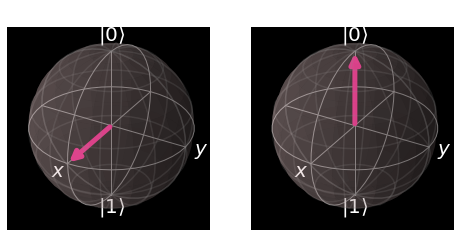

In [33]:
circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
circuit.h(0)  # hadamard gate on qubit0
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

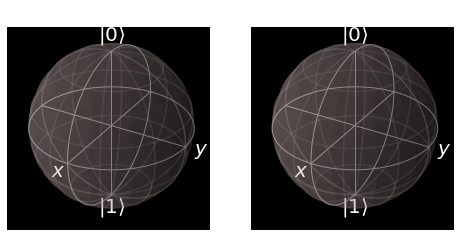

In [34]:
circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
circuit.h(0)  # hadamard gate on qubit0
circuit.cx(0,1)  # controlled not control: 0 target: 1
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

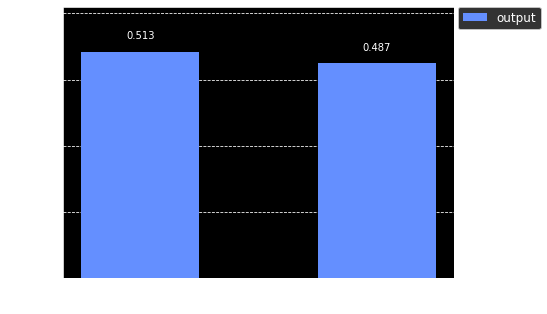

In [35]:
plot_histogram([counts], legend=['output'])

### 3 Qubit Manipulation

In [36]:
circuit = q.QuantumCircuit(3,3)  # 3 qubits, 2 classical bits 
circuit.h(0)
circuit.h(1)
circuit.cx(0,2)
circuit.cx(1,2)
circuit.draw()

┌───┐          
q_0: ┤ H ├──■───────
     ├───┤  │       
q_1: ┤ H ├──┼────■──
     └───┘┌─┴─┐┌─┴─┐
q_2: ─────┤ X ├┤ X ├
          └───┘└───┘
c: 3/═══════════════

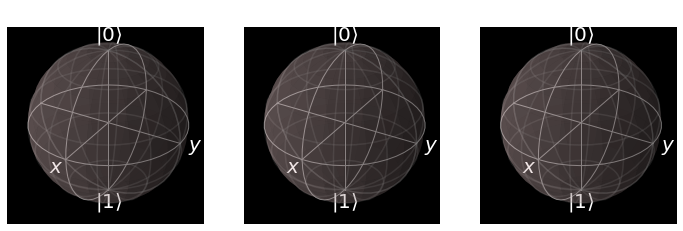

In [37]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

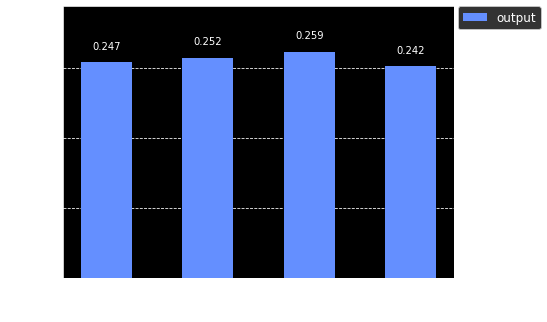

In [38]:
plot_histogram([counts], legend=['output'])

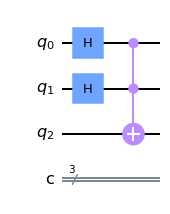

In [39]:
circuit = q.QuantumCircuit(3,3)  # 3 qubits, 3 classical bits 
circuit.h(0)
circuit.h(1)
circuit.ccx(0,1,2)
circuit.draw(output="mpl")

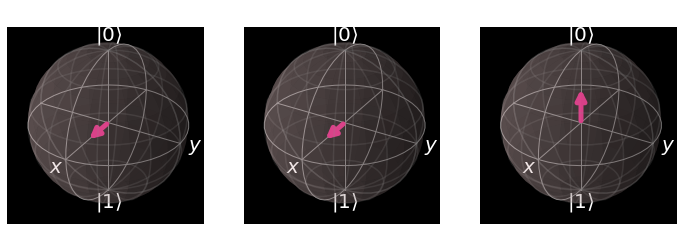

In [40]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

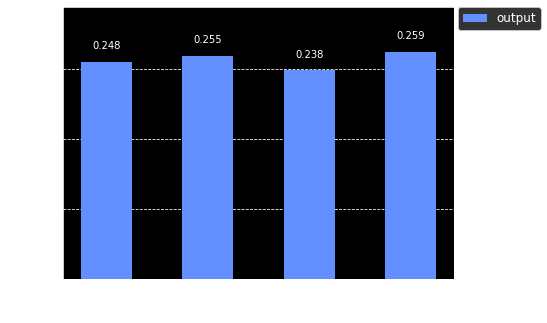

In [41]:
plot_histogram([counts], legend=['output'])

In [42]:
circuit = q.QuantumCircuit(3,1)  # 3 qubits, only 1 classical bit

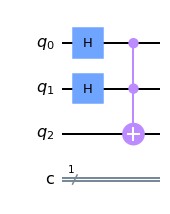

In [43]:
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.draw(output="mpl")

In [44]:
circuit.measure([2], [0])  # map qubit @ index 2, to classical bit idx 0.
result = q.execute(circuit, backend=qasm_sim, shots=1024).result()

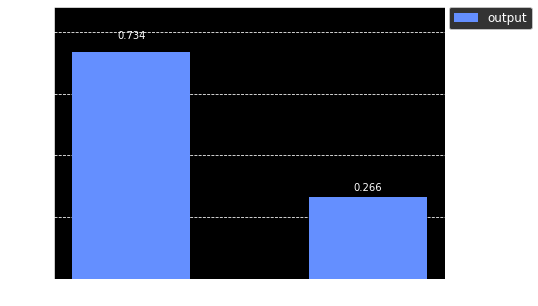

In [45]:
counts = result.get_counts()
plot_histogram([counts], legend=['output'])

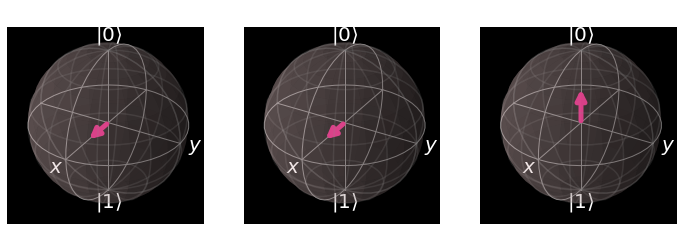

In [46]:
import math

circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not


statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

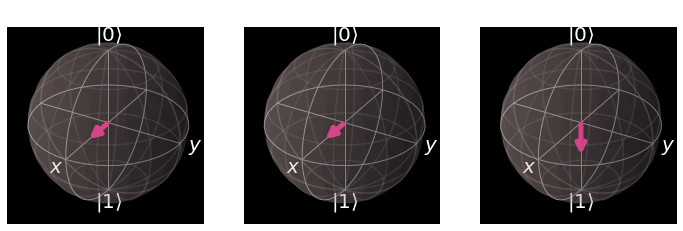

In [47]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)



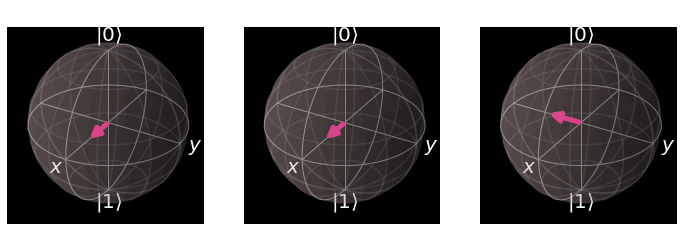

In [48]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/2, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

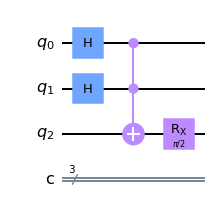

In [49]:
circuit = q.QuantumCircuit(3,3) 
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/2, 2)
circuit.draw(output="mpl")

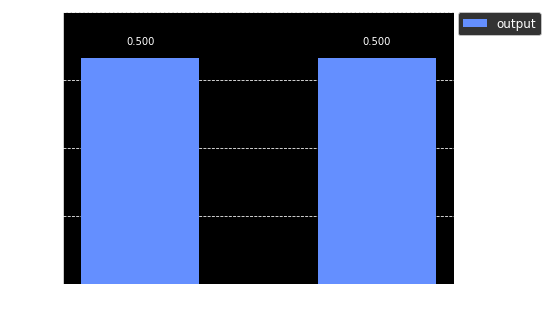

In [50]:
circuit.measure([2], [0])  # map qubit @ index 2, to classical bit idx 0.
result = q.execute(circuit, backend=qasm_sim, shots=1024).result()
counts = result.get_counts()
plot_histogram([counts], legend=['output'])

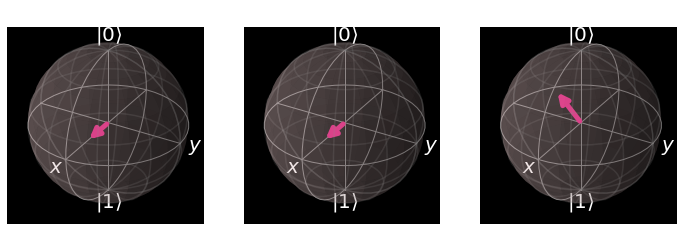

In [51]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/4, 2)

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

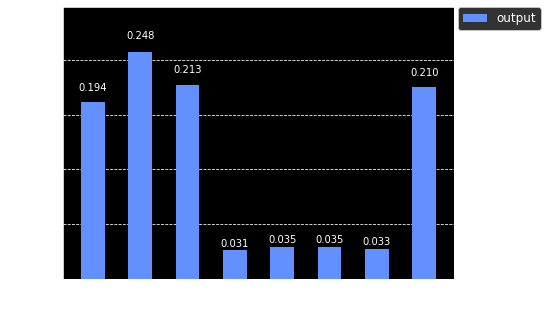

In [52]:
plot_histogram([counts], legend=['output'])

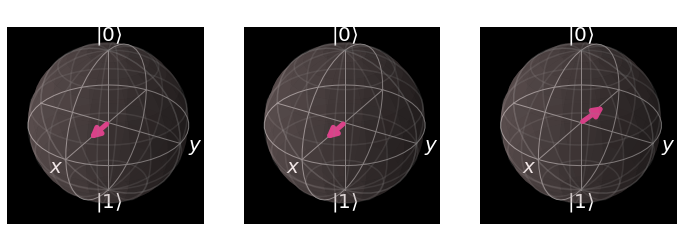

In [53]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

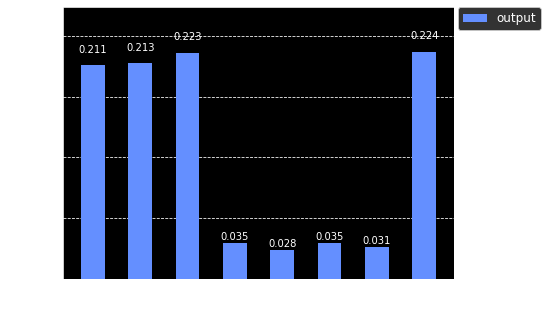

In [54]:
plot_histogram([counts], legend=['output'])

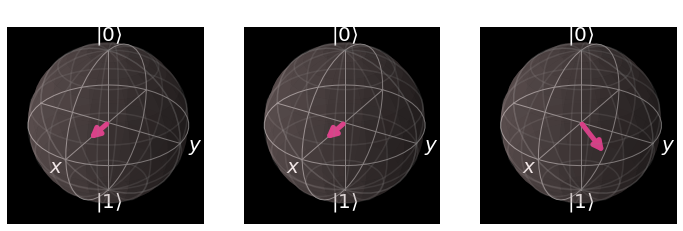

In [55]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
circuit.ry(math.pi, 2)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

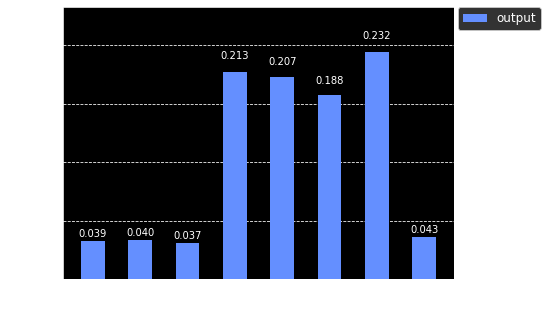

In [56]:
plot_histogram([counts], legend=['output'])

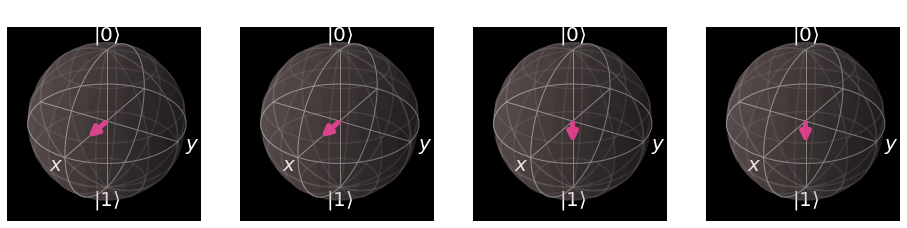

In [57]:
circuit = q.QuantumCircuit(4,4)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
circuit.ry(math.pi, 2)
circuit.cx(2,3)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

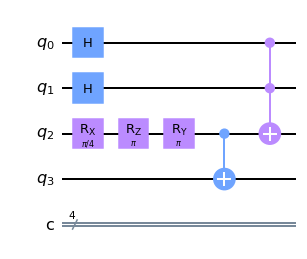

In [58]:
circuit = q.QuantumCircuit(4,4)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
circuit.ry(math.pi, 2)
circuit.cx(2,3)

# moving this down here to the very end:
circuit.ccx(0,1,2)  # controlled controlled not
circuit.draw(output="mpl")

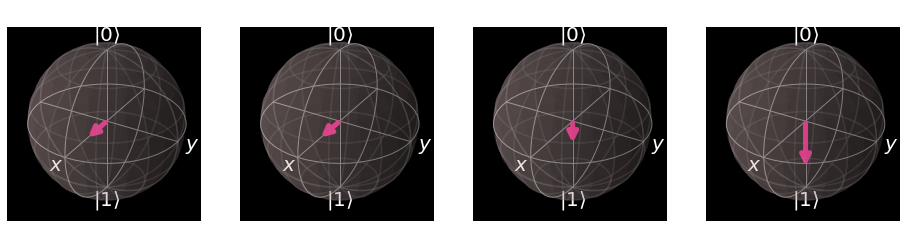

In [59]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

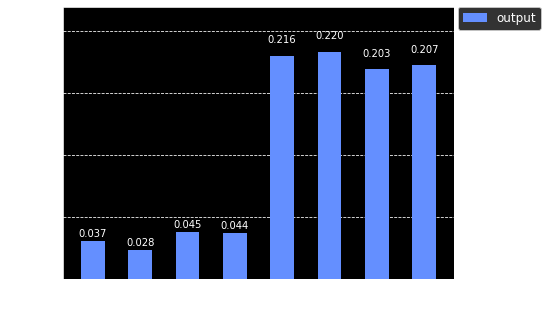

In [60]:
plot_histogram([counts], legend=['output'])

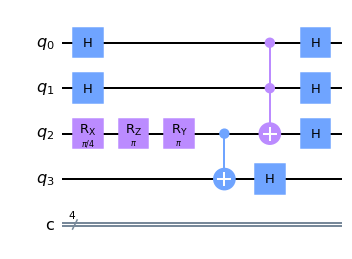

In [61]:
circuit = q.QuantumCircuit(4,4)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
circuit.ry(math.pi, 2)
circuit.cx(2,3)
# moving this down here to the very end:
circuit.ccx(0,1,2)  # controlled controlled not

circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.h(3)

circuit.draw(output="mpl")

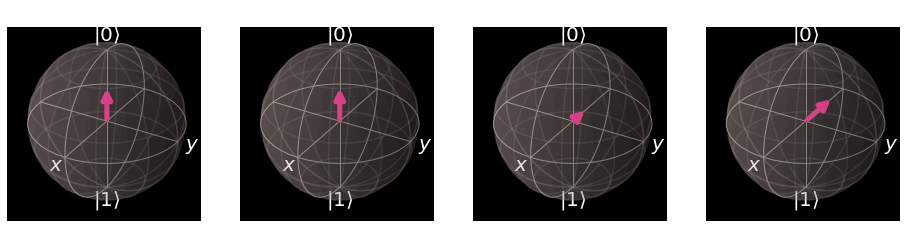

In [62]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

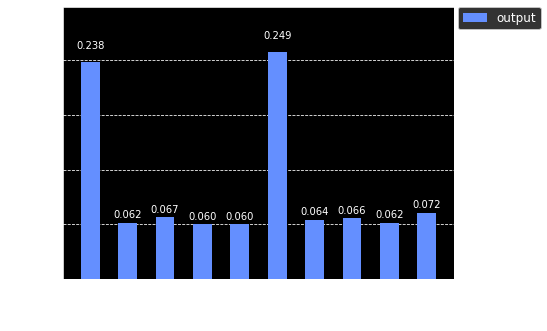

In [63]:
plot_histogram([counts], legend=['output'])

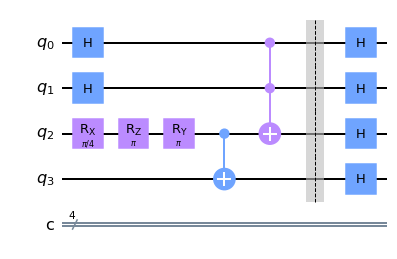

In [64]:
circuit = q.QuantumCircuit(4,4)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.rx(math.pi/4, 2)
circuit.rz(math.pi, 2)
circuit.ry(math.pi, 2)
circuit.cx(2,3)
# moving this down here to the very end:
circuit.ccx(0,1,2)  # controlled controlled not
circuit.barrier()
circuit.h(0)
circuit.h(1)
circuit.h(2)
circuit.h(3)

circuit.draw(output="mpl")

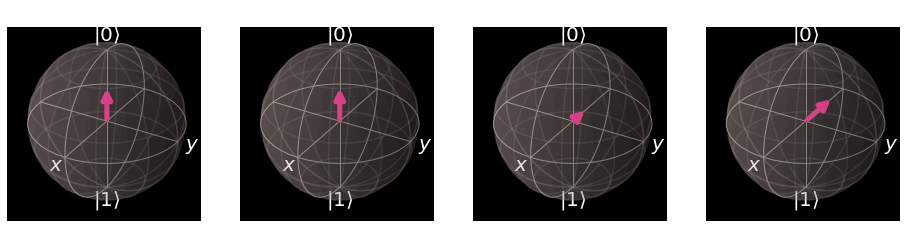

In [65]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

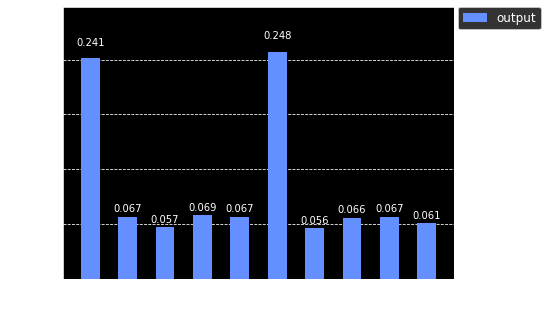

In [66]:
plot_histogram([counts], legend=['output'])

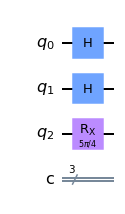

In [67]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.rx(math.pi*1.25, 2)
circuit.draw(output="mpl")

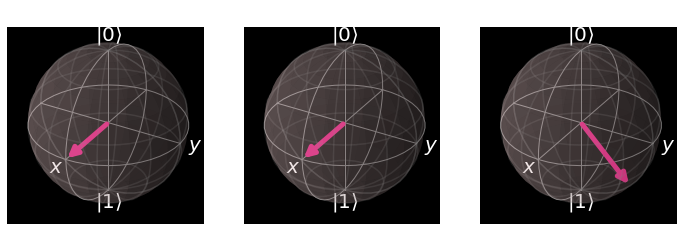

In [68]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

In [69]:
circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.x(2)
circuit.crz(math.pi, 1, 2)  # theta, control, target
circuit.draw()

┌───┐         
q_0: ┤ H ├─────────
     ├───┤         
q_1: ┤ H ├────■────
     ├───┤┌───┴───┐
q_2: ┤ X ├┤ Rz(π) ├
     └───┘└───────┘
c: 3/══════════════

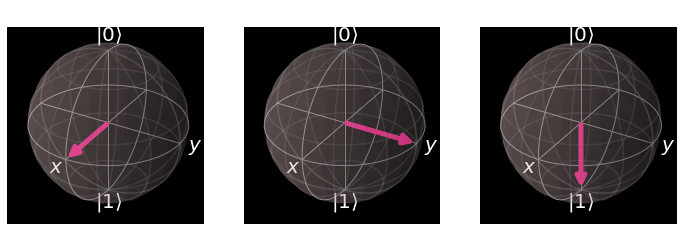

In [70]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

# Deutsch-Jozsa Algorithm

#### Deutsch-Jozsa Problem

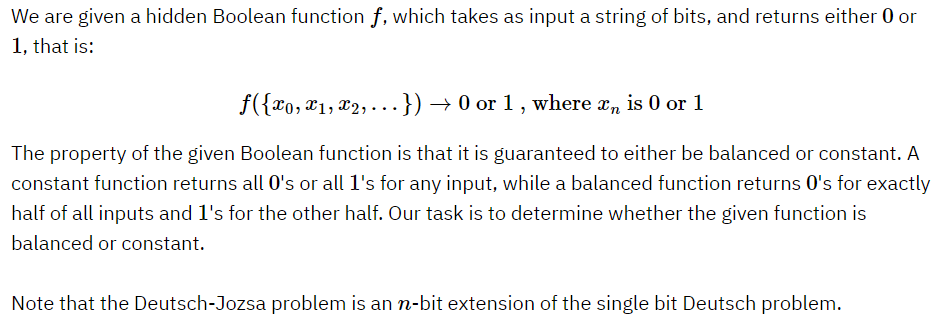

#### The Classical Solution 

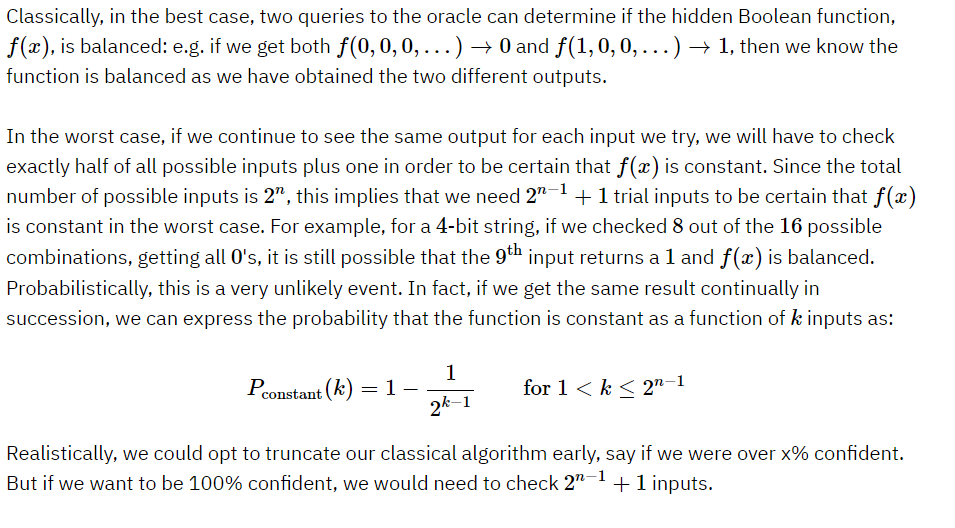

#### Quantum Solution

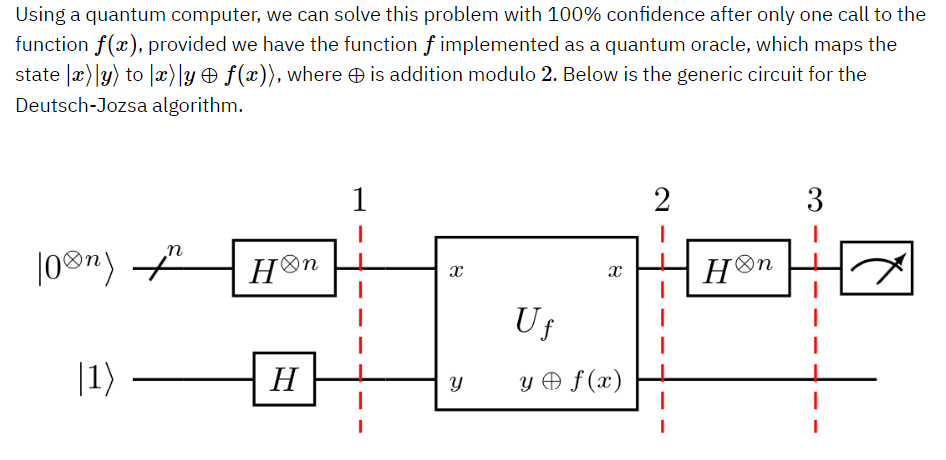

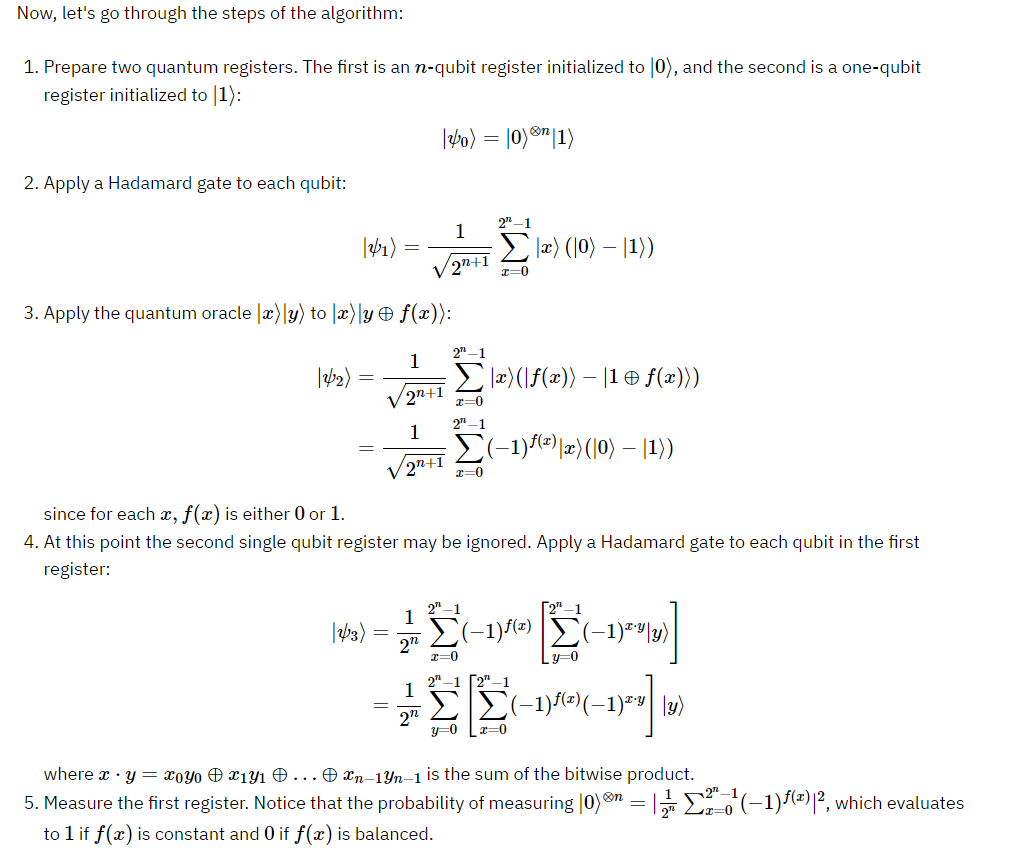

#### Algorithm

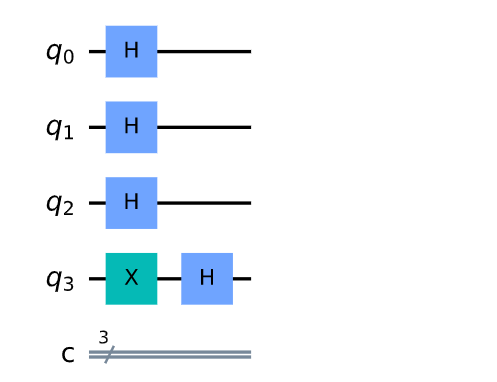

In [71]:
import qiskit as q
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from matplotlib import style
import math
#style.use("dark_background")
%matplotlib inline

qasm_sim = q.Aer.get_backend('qasm_simulator')
statevec_sim = q.Aer.get_backend("statevector_simulator")

### Uncertain Qubits

In [72]:
c = q.QuantumCircuit(2,2)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
c.draw()

┌─────────┐┌─┐   
q_0: ┤ Ry(π/4) ├┤M├───
     ├─────────┤└╥┘┌─┐
q_1: ┤ Ry(π/4) ├─╫─┤M├
     └─────────┘ ║ └╥┘
c: 2/════════════╩══╩═
                 0  1

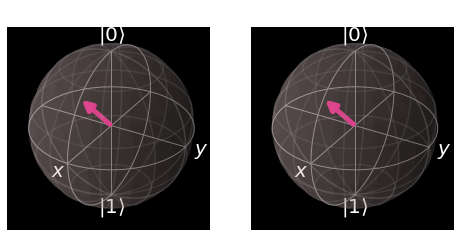

In [73]:
plot_bloch_multivector(orig_statevec)

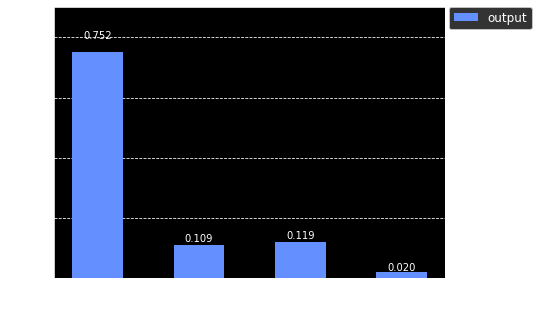

In [74]:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['output'])

### Uncertain Qubits & Hadamard at begining

In [75]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
c.draw()

┌───┐┌─────────┐┌─┐   
q_0: ┤ H ├┤ Ry(π/4) ├┤M├───
     ├───┤├─────────┤└╥┘┌─┐
q_1: ┤ H ├┤ Ry(π/4) ├─╫─┤M├
     └───┘└─────────┘ ║ └╥┘
c: 2/═════════════════╩══╩═
                      0  1

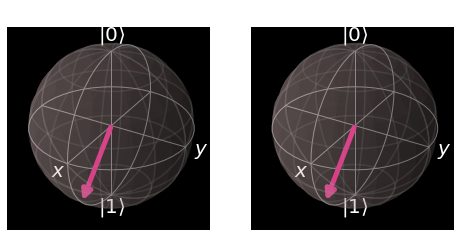

In [76]:
plot_bloch_multivector(statevec)

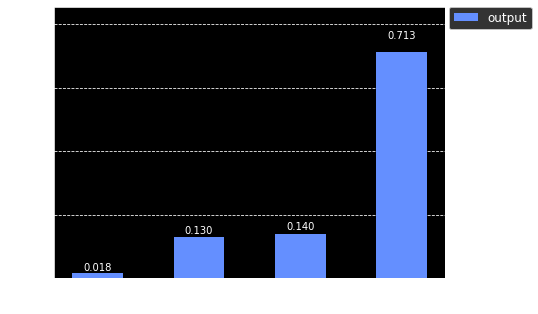

In [77]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

### Uncertain Qubits & Hadamard sandwitch

In [78]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
c.draw()

┌───┐┌─────────┐┌───┐┌─┐   
q_0: ┤ H ├┤ Ry(π/4) ├┤ H ├┤M├───
     ├───┤├─────────┤├───┤└╥┘┌─┐
q_1: ┤ H ├┤ Ry(π/4) ├┤ H ├─╫─┤M├
     └───┘└─────────┘└───┘ ║ └╥┘
c: 2/══════════════════════╩══╩═
                           0  1

#### Comparision with Uncertain Qubit with Initial Qubit 

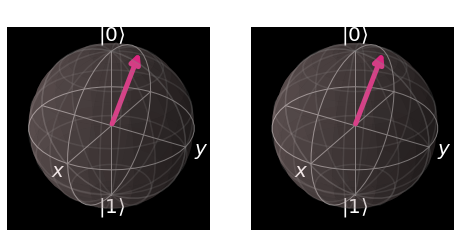

In [79]:
plot_bloch_multivector(statevec)

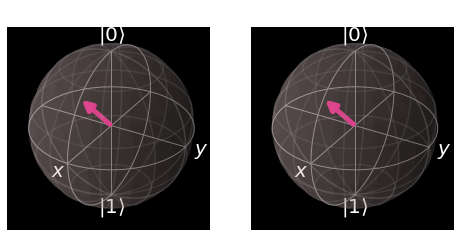

In [80]:
plot_bloch_multivector(orig_statevec)

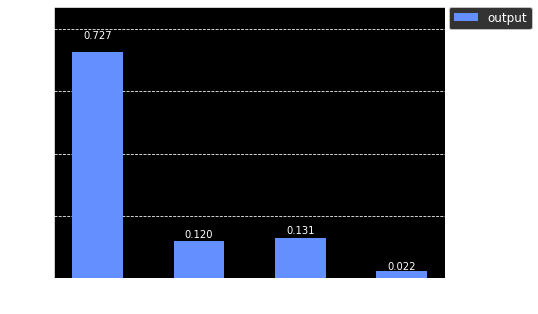

In [81]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

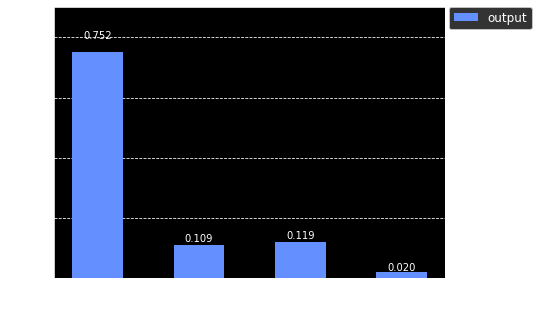

In [82]:
plot_histogram([orig_counts], legend=['output'])

### Certain Qubit(High probable)

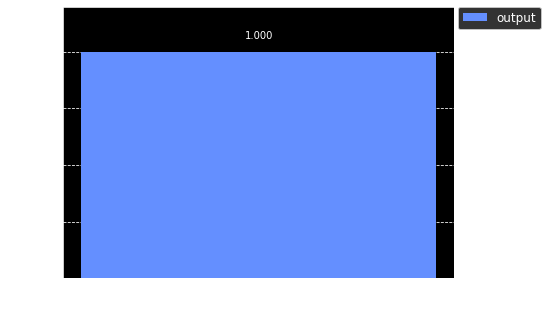

In [83]:
c = q.QuantumCircuit(2,2)
c.x(0)
c.x(1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['output'])

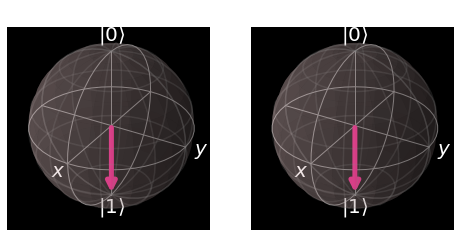

In [84]:
plot_bloch_multivector(orig_statevec)

### Certain cubit with hadamard sandwitch

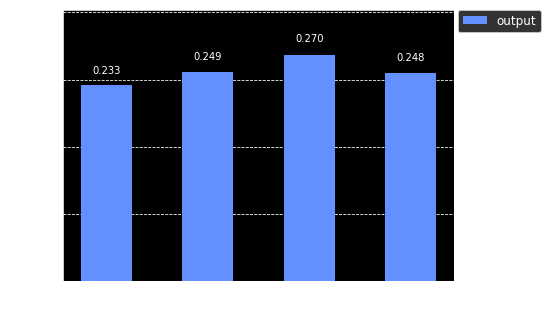

In [85]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

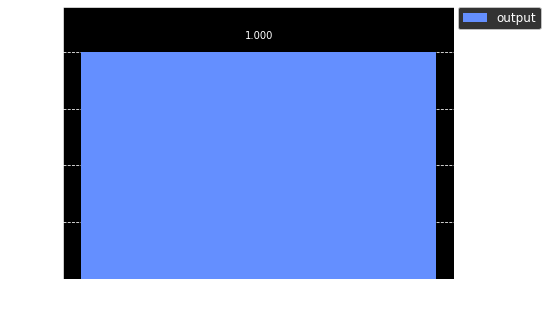

In [86]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])



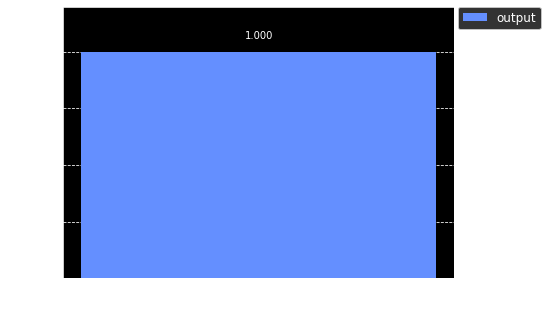

In [87]:
plot_histogram([orig_counts], legend=['output'])

## Creating Oracle i.e Black box

In [88]:
def balanced_black_box(c):
    c.cx(0,2)
    c.cx(1,2)
    return c
    
def constant_black_box(c):
    # outputs whatever you put in. 
    return c

In [89]:
c = q.QuantumCircuit(3,2)
c = balanced_black_box(c)
c.draw()

q_0: ──■───────
       │       
q_1: ──┼────■──
     ┌─┴─┐┌─┴─┐
q_2: ┤ X ├┤ X ├
     └───┘└───┘
c: 2/══════════

In [90]:
c = q.QuantumCircuit(3,2)
c.h(0)
c.h(1)
c.h(2)
c = balanced_black_box(c)
c.h(0)
c.h(1)
# no need for ending H on q[2]
c.draw()

┌───┐     ┌───┐     
q_0: ┤ H ├──■──┤ H ├─────
     ├───┤  │  └───┘┌───┐
q_1: ┤ H ├──┼────■──┤ H ├
     ├───┤┌─┴─┐┌─┴─┐└───┘
q_2: ┤ H ├┤ X ├┤ X ├─────
     └───┘└───┘└───┘     
c: 2/════════════════════

In [91]:
c = q.QuantumCircuit(3,2)
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
# no need for ending H on q[2]
c.draw()


┌───┐ ░            ░ ┌───┐
q_0: ┤ H ├─░───■────────░─┤ H ├
     ├───┤ ░   │        ░ ├───┤
q_1: ┤ H ├─░───┼────■───░─┤ H ├
     ├───┤ ░ ┌─┴─┐┌─┴─┐ ░ └───┘
q_2: ┤ H ├─░─┤ X ├┤ X ├─░──────
     └───┘ ░ └───┘└───┘ ░      
c: 2/══════════════════════════

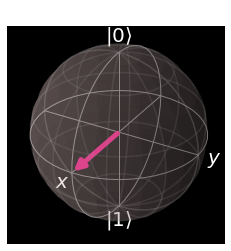

In [92]:
c = q.QuantumCircuit(1,1)
c.h(0)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

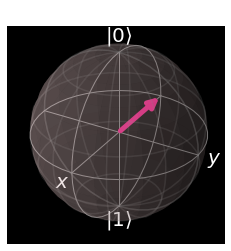

In [93]:
c = q.QuantumCircuit(1,1)
c.x(0)
c.h(0)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

In [94]:
c = q.QuantumCircuit(3,2)
c.x(2)  # adding this not gate
c.barrier() # barrier for clarity
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
# no need for ending H on q[2]... even though it'd make the sandwich look better :(
c.draw()

░ ┌───┐ ░            ░ ┌───┐
q_0: ──────░─┤ H ├─░───■────────░─┤ H ├
           ░ ├───┤ ░   │        ░ ├───┤
q_1: ──────░─┤ H ├─░───┼────■───░─┤ H ├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌─┴─┐ ░ └───┘
q_2: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├─░──────
     └───┘ ░ └───┘ ░ └───┘└───┘ ░      
c: 2/══════════════════════════════════

In [95]:
c = q.QuantumCircuit(3,2)
c.x(2)  # adding this not gate
c.barrier() # barrier for clarity
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])
# no need for ending H on q[2]... even though it'd make the sandwich look better :(
c.draw()

░ ┌───┐ ░            ░ ┌───┐┌─┐   
q_0: ──────░─┤ H ├─░───■────────░─┤ H ├┤M├───
           ░ ├───┤ ░   │        ░ ├───┤└╥┘┌─┐
q_1: ──────░─┤ H ├─░───┼────■───░─┤ H ├─╫─┤M├
     ┌───┐ ░ ├───┤ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║ └╥┘
q_2: ┤ X ├─░─┤ H ├─░─┤ X ├┤ X ├─░───────╫──╫─
     └───┘ ░ └───┘ ░ └───┘└───┘ ░       ║  ║ 
c: 2/═══════════════════════════════════╩══╩═
                                        0  1

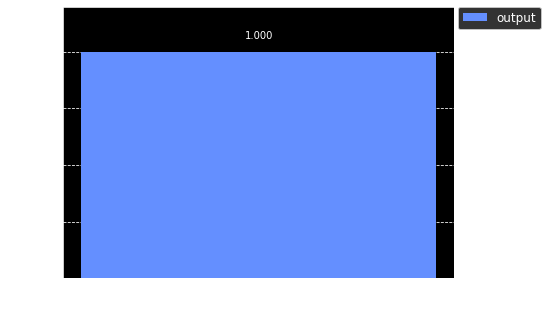

In [96]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

In [97]:
c = q.QuantumCircuit(3,2)
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = constant_black_box(c)  # changed to constant box.
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])
c.draw()

░ ┌───┐ ░  ░ ┌───┐┌─┐   
q_0: ──────░─┤ H ├─░──░─┤ H ├┤M├───
           ░ ├───┤ ░  ░ ├───┤└╥┘┌─┐
q_1: ──────░─┤ H ├─░──░─┤ H ├─╫─┤M├
     ┌───┐ ░ ├───┤ ░  ░ └───┘ ║ └╥┘
q_2: ┤ X ├─░─┤ H ├─░──░───────╫──╫─
     └───┘ ░ └───┘ ░  ░       ║  ║ 
c: 2/═════════════════════════╩══╩═
                              0  1

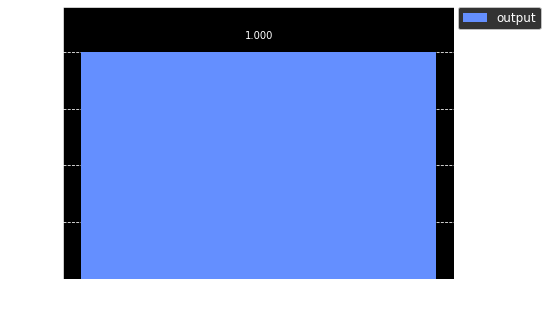

In [98]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

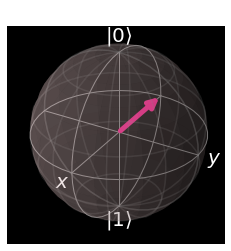

In [99]:
c = q.QuantumCircuit(1,1)
c.x(0)
c.h(0)

statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

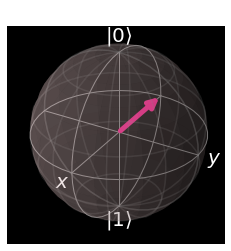

In [100]:
c = q.QuantumCircuit(1,1)
c.ry(math.pi,0)
c.h(0)

statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

## Affects of Balanced Black Box v/s Constant Black Box in Circuit

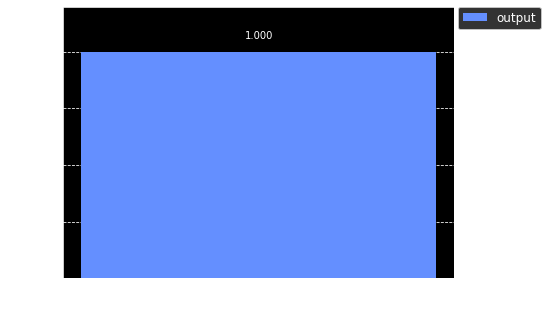

In [101]:
c = q.QuantumCircuit(3,2)

c.barrier()
c.ry(math.pi,2)  # changed c.x(2) to this.
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

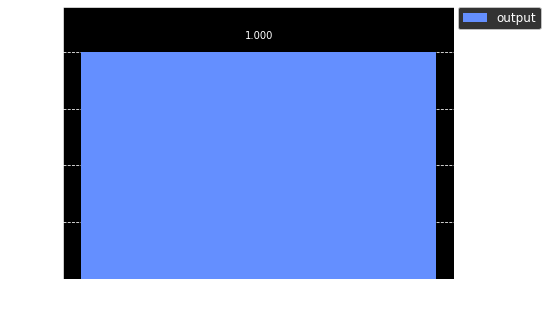

In [102]:
c = q.QuantumCircuit(3,2)
c.ry(math.pi,2)  # changed c.x(2) to this.
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

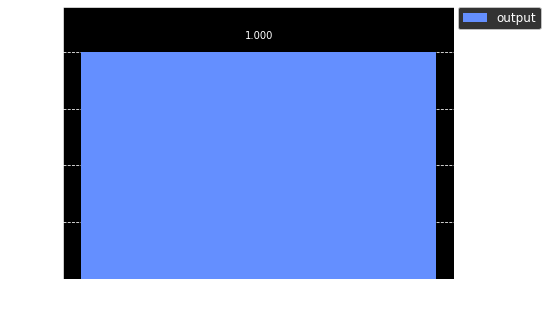

In [103]:
c = q.QuantumCircuit(3,2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.x(2)  # moving the not gate here
c.barrier()
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

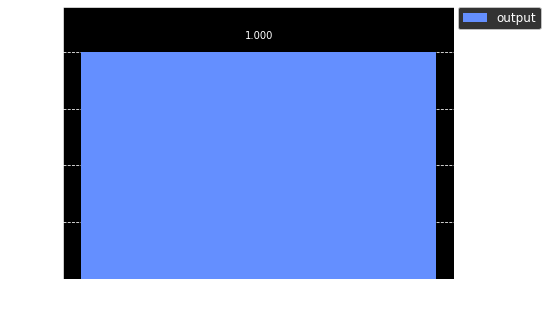

In [104]:
c = q.QuantumCircuit(3,2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.x(2)  # moved the not gate here
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

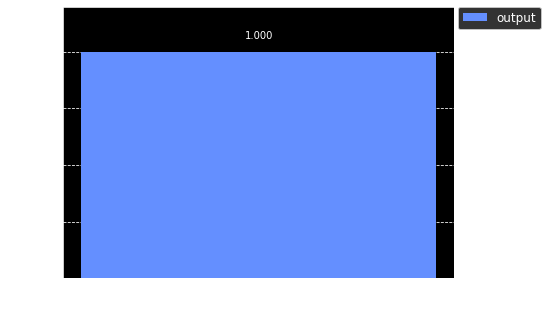

In [105]:
c = q.QuantumCircuit(3,2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.ry(math.pi,2)  # changed c.x(2) to this.
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])


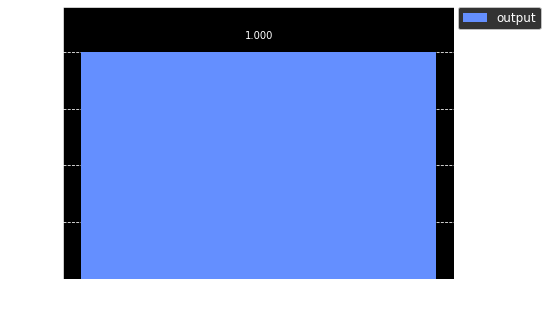

In [106]:
c = q.QuantumCircuit(3,2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.ry(math.pi,2)  # changed c.x(2) to this.
c.barrier()
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])

counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

# Quantum Machine Learning

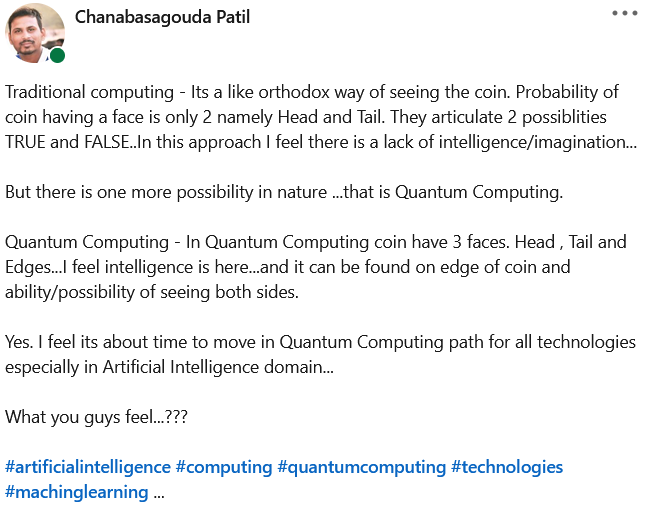

In [107]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import Aer, QuantumCircuit
from qiskit.opflow import Z, I, StateFn
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B

from qiskit_machine_learning.neural_networks import TwoLayerQNN, CircuitQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR

from typing import Union

from qiskit_machine_learning.exceptions import QiskitMachineLearningError

from IPython.display import clear_output

algorithm_globals.random_seed = 42

In [108]:
quantum_instance = QuantumInstance(Aer.get_backend("aer_simulator"), shots=1024)
quantum_instance

### Generating dummy dataset

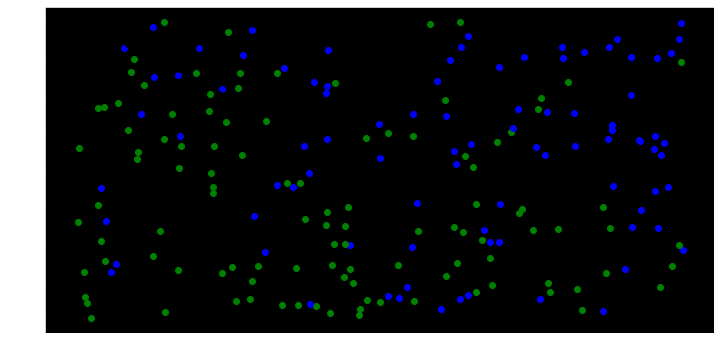

In [116]:
num_inputs = 5
num_samples = 200
X = 2 * algorithm_globals.random.random([num_samples, num_inputs]) - 1
y01 = 1 * (np.sum(X, axis=1) >= 0)  # in { 0,  1}
y = 2 * y01 - 1  # in {-1, +1}
y_one_hot = np.zeros((num_samples, 2))

for i in range(num_samples):
    y_one_hot[i, y01[i]] = 1

for x, y_target in zip(X, y):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

In [ ]:
#y_one_hot

## Classification with the an OpflowQNN

In [118]:
# construct QNN
opflow_qnn = TwoLayerQNN(num_inputs, quantum_instance=quantum_instance)

In [119]:
# QNN maps inputs to [-1, +1]
opflow_qnn.forward(X[0, :], algorithm_globals.random.random(opflow_qnn.num_weights))

array([[0.03515625]])

#### Callback Graph

In [120]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [121]:
# construct neural network classifier
opflow_classifier = NeuralNetworkClassifier(opflow_qnn, optimizer=COBYLA(), callback=callback_graph)

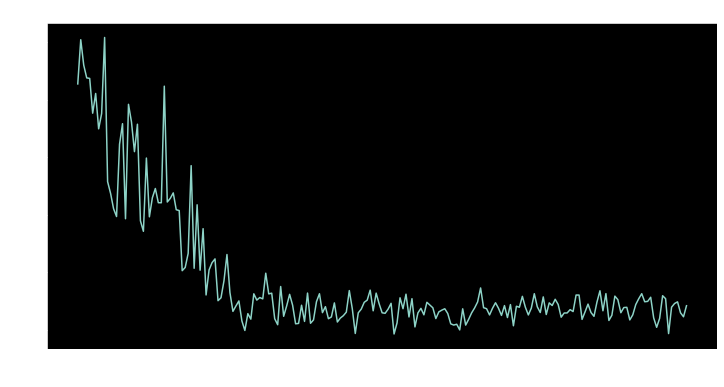

0.63

In [122]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
opflow_classifier.fit(X, y)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
opflow_classifier.score(X, y)

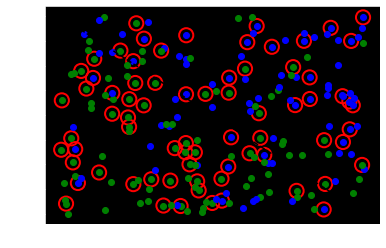

In [123]:
# evaluate data points
y_predict = opflow_classifier.predict(X)

# plot results
# red == wrongly classified
for x, y_target, y_p in zip(X, y, y_predict):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if y_target != y_p:
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

## Classification with a CircuitQNN

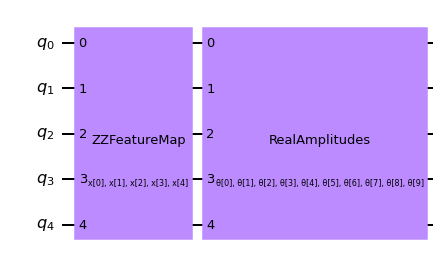

In [124]:
# construct feature map
feature_map = ZZFeatureMap(num_inputs)

# construct ansatz
ansatz = RealAmplitudes(num_inputs, reps=1)

# construct quantum circuit
qc = QuantumCircuit(num_inputs)
qc.append(feature_map, range(num_inputs))
qc.append(ansatz, range(num_inputs))
qc.decompose().draw(output="mpl")

In [125]:
# parity maps bitstrings to 0 or 1
def parity(x):
    return "{:b}".format(x).count("1") % 2


output_shape = 2  # corresponds to the number of classes, possible outcomes of the (parity) mapping.

In [126]:
# construct QNN
circuit_qnn = CircuitQNN(
    circuit=qc,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
    interpret=parity,
    output_shape=output_shape,
    quantum_instance=quantum_instance,
)

In [127]:
# construct classifier
circuit_classifier = NeuralNetworkClassifier(
    neural_network=circuit_qnn, optimizer=COBYLA(), callback=callback_graph
)

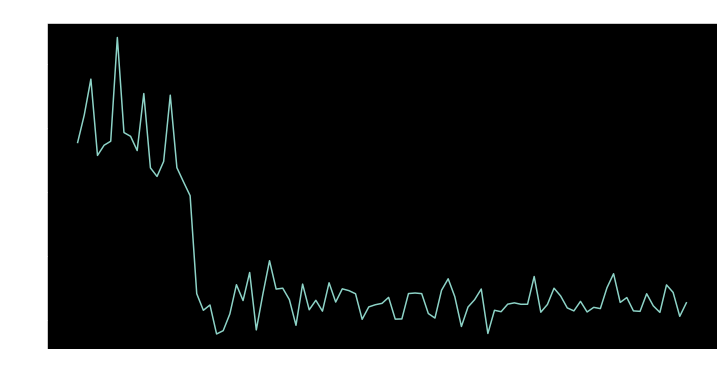

0.585

In [128]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
circuit_classifier.fit(X, y01)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
circuit_classifier.score(X, y01)

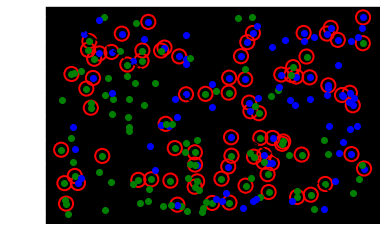

In [129]:
# evaluate data points
y_predict = circuit_classifier.predict(X)

# plot results
# red == wrongly classified
for x, y_target, y_p in zip(X, y01, y_predict):
    if y_target == 1:
        plt.plot(x[0], x[1], "bo")
    else:
        plt.plot(x[0], x[1], "go")
    if y_target != y_p:
        plt.scatter(x[0], x[1], s=200, facecolors="none", edgecolors="r", linewidths=2)
plt.plot([-1, 1], [1, -1], "--", color="black")
plt.show()

## For multi class classification we use Variational Quantum Classifier (VQC).

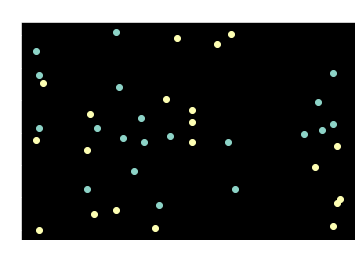

0.8

In [140]:
from qiskit_machine_learning.datasets import ad_hoc_data
X_train, y_train, X_test, y_test = ad_hoc_data(20, 10, 2, 0.1, True)
# import the variational quantum classifier
from qiskit_machine_learning.algorithms import VQC
# import the feature map and ansatz circuits
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
# import the optimizer for the training
from qiskit.algorithms.optimizers import L_BFGS_B
# import backend
from qiskit.providers.aer import QasmSimulator
# construct classifier
num_qubits = 2
vqc = VQC(feature_map=ZZFeatureMap(num_qubits), 
          ansatz=RealAmplitudes(num_qubits, reps=1), 
          loss='cross_entropy', 
          optimizer=L_BFGS_B(),
          quantum_instance=QasmSimulator())
# train classifier
vqc.fit(X_train, y_train)
# score result
vqc.score(X_test, y_test)

### Reference